In [1]:
from datetime import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score,recall_score

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [3]:
df = pd.read_csv("heart.csv")
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2,1
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [8]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

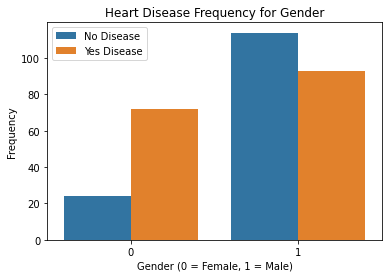

In [9]:
sns.countplot('sex', hue = 'target',data = df)

plt.title('Heart Disease Frequency for Gender')
plt.legend(['No Disease','Yes Disease'])

plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Frequency')

plt.show()

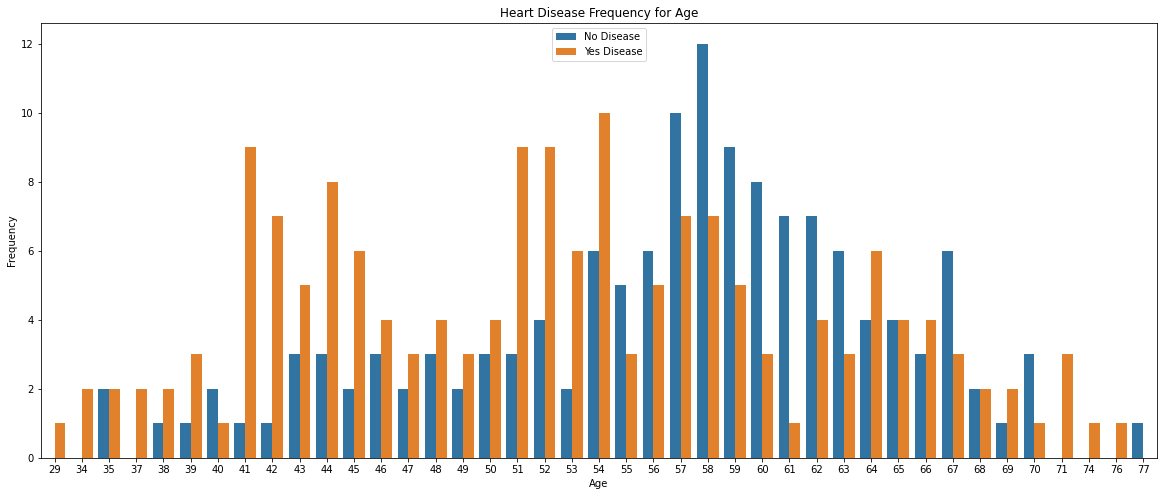

In [10]:
plt.figure(figsize = (20,8))
sns.countplot('age', hue = 'target', data = df)

plt.title('Heart Disease Frequency for Age')
plt.legend(['No Disease','Yes Disease'])

plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

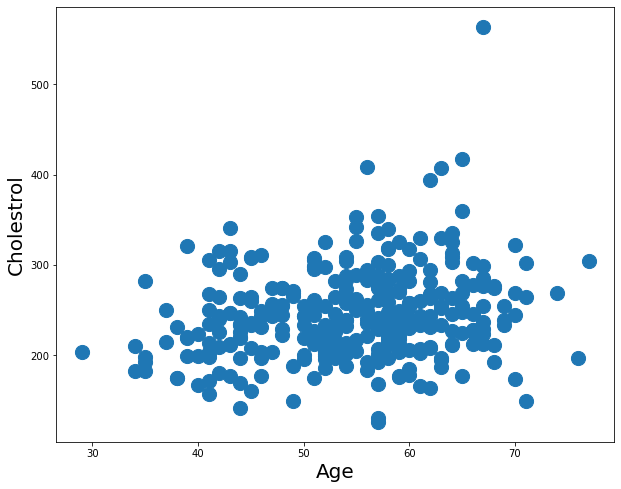

In [11]:
plt.figure(figsize = (10,8))

plt.scatter(df['age'], df['chol'], s = 200)

plt.xlabel('Age', fontsize = 20)
plt.ylabel('Cholestrol', fontsize = 20)

plt.show()

In [12]:
features = df.drop('target',axis = 1)
target = df['target']

In [13]:
features.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [14]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [15]:
features.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [18]:
categorical_features = features[[ 'sex', 'cp', 'fbs', 'restecg',
       'exang', 'slope', 'ca', 'thal']].copy()

In [19]:
categorical_features.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2


In [20]:
numeric_features = features[['age','trestbps','chol','thalach','oldpeak']].copy()
numeric_features.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [21]:
sc = StandardScaler()

numeric_features = pd.DataFrame(sc.fit_transform(numeric_features), columns = numeric_features.columns, 
                                index = numeric_features.index)

In [22]:
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,5.825923e-17,1.001654,-2.797624,-0.757280,0.069886,0.731619,2.496240
trestbps,303.0,-7.146832e-16,1.001654,-2.148802,-0.663867,-0.092738,0.478391,3.905165
chol,303.0,-9.828955e-17,1.001654,-2.324160,-0.681494,-0.121055,0.545674,6.140401
thalach,303.0,-5.203025e-16,1.001654,-3.439267,-0.706111,0.146634,0.715131,2.289429
oldpeak,303.0,-3.140136e-16,1.001654,-0.896862,-0.896862,-0.206705,0.483451,4.451851


In [23]:
processed_features = pd.concat([numeric_features, categorical_features], axis = 1, sort = False)
processed_features.head()

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,3,1,0,0,0,0,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,2,0,1,0,0,0,2
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,1,0,0,0,2,0,2
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,1,0,1,0,2,0,2
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,0,0,1,1,2,0,2


In [24]:
x_train,x_test,y_train,y_test = train_test_split(processed_features, target, test_size = 0.2, random_state = 1)

In [25]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.15, random_state = 10)

In [26]:
x_train.shape, x_test.shape, x_val.shape

((205, 13), (61, 13), (37, 13))

In [27]:
y_train.shape, y_test.shape, y_val.shape

((205,), (61,), (37,))

In [63]:
def build_model():
    
    inputs = tf.keras.Input(shape = (x_train.shape[1],))
    
    dense_layer1 = layers.Dense(12, activation = 'relu')
    x = dense_layer1(inputs)
    
    dropout_layer = layers.Dropout(0.3)
    x = dropout_layer(x)
    
    dense_layer2 = layers.Dense(8, activation = 'relu')
    x = dense_layer2(x)
    
    predictions_layer = layers.Dense(1, activation = 'sigmoid')
    predictions = predictions_layer(x)
    
    model = tf.keras.Model(inputs = inputs, outputs = predictions)
    
    model.summary()
    
    model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
                 loss = tf.keras.losses.BinaryCrossentropy(),
                 metrics = ['accuracy',
                 tf.keras.metrics.Precision(0.5),
                 tf.keras.metrics.Recall(0.5)])
    return model
    

In [64]:
model = build_model()

Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 13)]              0         
_________________________________________________________________
dense_31 (Dense)             (None, 12)                168       
_________________________________________________________________
dropout_10 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 9         
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [65]:
# keras.utils.plot_model(model, show_shapes = True)

In [66]:
dataset_train = tf.data.Dataset.from_tensor_slices((x_train.values,y_train.values))
dataset_train = dataset_train.batch(16)

dataset_train.shuffle(128)

<ShuffleDataset shapes: ((None, 13), (None,)), types: (tf.float64, tf.int64)>

In [67]:
dataset_val = tf.data.Dataset.from_tensor_slices((x_val.values,y_val.values))
dataset_val = dataset_val.batch(16)

In [68]:
num_epochs = 100

In [69]:
model = build_model()

Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 13)]              0         
_________________________________________________________________
dense_34 (Dense)             (None, 12)                168       
_________________________________________________________________
dropout_11 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 9         
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [70]:
training_history = model.fit(dataset_train, epochs = num_epochs, validation_data = dataset_val)
training_history

Epoch 1/100
13/13 [==============================] - 0s 25ms/step - loss: 0.7777 - accuracy: 0.5122 - precision_10: 0.5449 - recall_10: 0.7456 - val_loss: 0.7835 - val_accuracy: 0.3514 - val_precision_10: 0.4286 - val_recall_10: 0.6000
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7946 - accuracy: 0.4732 - precision_10: 0.5200 - recall_10: 0.6842 - val_loss: 0.7450 - val_accuracy: 0.4595 - val_precision_10: 0.5000 - val_recall_10: 0.6500
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7712 - accuracy: 0.4683 - precision_10: 0.5166 - recall_10: 0.6842 - val_loss: 0.7187 - val_accuracy: 0.5405 - val_precision_10: 0.5556 - val_recall_10: 0.7500
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7083 - accuracy: 0.5805 - precision_10: 0.5909 - recall_10: 0.7982 - val_loss: 0.6997 - val_accuracy: 0.5676 - val_precision_10: 0.5769 - val_recall_10: 0.7500
Epoch 5/100
13/13 [==============================] - 0s 2ms

Epoch 36/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.8244 - precision_10: 0.8305 - recall_10: 0.8596 - val_loss: 0.4907 - val_accuracy: 0.7027 - val_precision_10: 0.6800 - val_recall_10: 0.8500
Epoch 37/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.7854 - precision_10: 0.7917 - recall_10: 0.8333 - val_loss: 0.4907 - val_accuracy: 0.7027 - val_precision_10: 0.6800 - val_recall_10: 0.8500
Epoch 38/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4483 - accuracy: 0.8049 - precision_10: 0.8190 - recall_10: 0.8333 - val_loss: 0.4907 - val_accuracy: 0.7027 - val_precision_10: 0.6800 - val_recall_10: 0.8500
Epoch 39/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3981 - accuracy: 0.8341 - precision_10: 0.8571 - recall_10: 0.8421 - val_loss: 0.4916 - val_accuracy: 0.7027 - val_precision_10: 0.6800 - val_recall_10: 0.8500
Epoch 40/100
13/13 [==============================] - 0s

Epoch 71/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3352 - accuracy: 0.8585 - precision_10: 0.8571 - recall_10: 0.8947 - val_loss: 0.4897 - val_accuracy: 0.7297 - val_precision_10: 0.7083 - val_recall_10: 0.8500
Epoch 72/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3581 - accuracy: 0.8390 - precision_10: 0.8403 - recall_10: 0.8772 - val_loss: 0.4932 - val_accuracy: 0.7027 - val_precision_10: 0.6800 - val_recall_10: 0.8500
Epoch 73/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3406 - accuracy: 0.8488 - precision_10: 0.8217 - recall_10: 0.9298 - val_loss: 0.4929 - val_accuracy: 0.7027 - val_precision_10: 0.6800 - val_recall_10: 0.8500
Epoch 74/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3521 - accuracy: 0.8537 - precision_10: 0.8443 - recall_10: 0.9035 - val_loss: 0.4926 - val_accuracy: 0.7297 - val_precision_10: 0.7083 - val_recall_10: 0.8500
Epoch 75/100
13/13 [==============================] - 0s

In [71]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'precision_10', 'recall_10', 'val_loss', 'val_accuracy', 'val_precision_10', 'val_recall_10'])

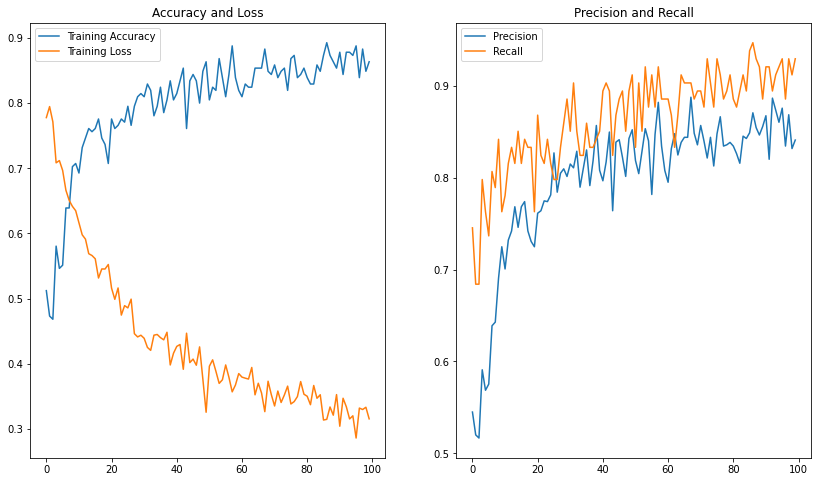

In [74]:
train_acc = training_history.history['accuracy']
train_loss = training_history.history['loss']

precision = training_history.history['precision_10']
recall = training_history.history['recall_10']

epochs_range = range(num_epochs)

plt.figure(figsize = (14,8))

plt.subplot(1,2,1)

plt.plot(epochs_range,train_acc, label = "Training Accuracy")
plt.plot(epochs_range,train_loss, label = "Training Loss")

plt.title("Accuracy and Loss")
plt.legend()

plt.subplot(1,2,2)

plt.plot(epochs_range, precision, label = "Precision")
plt.plot(epochs_range, recall, label = "Recall")

plt.title("Precision and Recall")
plt.legend()

plt.show()

In [76]:
score = model.evaluate(x_test,y_test)

score_df = pd.Series(score, index = model.metrics_names)
score_df

2/2 [==============================] - 0s 998us/step - loss: 0.5576 - accuracy: 0.7213 - precision_10: 0.6842 - recall_10: 0.8387


loss            0.557562
accuracy        0.721311
precision_10    0.684211
recall_10       0.838710
dtype: float64

In [77]:
y_pred = model.predict(x_test)

y_pred[:10]

array([[0.00614873],
       [0.7852839 ],
       [0.04615679],
       [0.01945293],
       [0.02074376],
       [0.01471949],
       [0.00518247],
       [0.40783927],
       [0.00687584],
       [0.9614452 ]], dtype=float32)

In [78]:
y_pred = np.where(y_pred >= 0.5, 1, y_pred)
y_pred = np.where(y_pred < 0.5, 0, y_pred)

In [79]:
y_pred[:10]

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [81]:
pred_results = pd.DataFrame({"y_test":y_test.values.flatten(),
                            "y_pred":y_pred.flatten().astype("int32")}, index = range(len(y_pred)))

In [82]:
pred_results.sample(10)

,y_test,y_pred
57,0,0
19,0,1
33,1,1
43,0,0
24,1,1
50,1,1
8,0,0
53,1,1
3,0,0
56,1,1


In [83]:
pd.crosstab(pred_results.y_pred, pred_results.y_test)

y_test,0,1
y_pred,,
0,18,5
1,12,26
